In [2]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to numerical algorithms
## Practice class 3 - Vectors, matrices, vector operations, linear and affine transformations

### Warmup Task 1

You are given a vector `x_np` of $n$ elements, define a new vector (d) of size $n−1$ such that $d_i = x_{i+1} - x_i$ for $i=1, \dots, n-1$.

Hint try doing this without writing your own loop. You should be able to use simple numpy indexing as described above.

In [4]:
x_np = np.array([1,8,3,2,1,9,7])

d = x_np[1:] - x_np[:-1]
print(d)

[ 7 -5 -1 -1  8 -2]


### Warmup Task 2

Given 2 lists. Write a one-liner that checks, if the vectors are equal element-wise. Use vectorization instead of list comprehension!

In [5]:
x = [-1, 0, 2, 3.1]
y = x.copy()
y[2] = 20.2

equality = (np.array_equal(x, y))
print(equality)

False


### Warmup Task 3

We have two vectors $x$ and $y$. We can get the linear combination of these two vectors as $ax+by$, where $a$ and $b$ are scalar coefficients.

In the following example, we are given two vectors (`x_np` and `y_np`), and two scalars (alpha and beta), and we obtain the linear combination.

In [6]:
x_np = np.array([1,2])
y_np = np.array([3,4])
alpha = 0.5
beta = -0.8
c = alpha*x_np + beta*y_np
print(c)



[-1.9 -2.2]


Write a function that computes the linear combination of arbitrary many coefficients and vectors! Make sure you have a fool test, i.e., your code should yield an error if there are too many or too few coefficients!   

In [7]:
def lincomb(coef: np.array, vectors: np.array) -> np.array: 
    if coef.shape[0] != vectors.shape[0]:
        raise ValueError("Number of coefficients must match number of vectors.")
    comb = np.dot(coef, vectors)
    return comb

v1 = np.array([1, 2])
v2 = np.array([3, 4])
v3 = np.array([5, 6])
vectors = np.array([v1, v2, v3])
coefficients = np.array([0.2, 0.3, 0.5])
result = lincomb(coefficients, vectors)
print(result)

coefficients = np.array([0.2, 0.3])
try:
    result = lincomb(coefficients, vectors)
except ValueError as e:
    print(e)

[3.6 4.6]
Number of coefficients must match number of vectors.


### Warmup Task 4

Define the matrix $A$ and the vector $u$ in Python. Then perform all of the tasks below.

$$A=\begin{pmatrix}
1&3&5&7\\
2&4&6&8\\
−3&−2&−1&0\\
\end{pmatrix}$$
and
$$u=\begin{pmatrix}
10\\
20\\
30\\
\end{pmatrix}$$
 

1. Print the matrix $A$, the vector $u$, the shape of $A$, and the shape of $u$.
2. Print the first column of $A$.
3. Print the first two rows of $A$.
4. Print the first two entries of $u$.
5. Print the last two entries of $u$.
6. Print the bottom left $2\times 2$ submatrix of $A$.
7. Print the middle two elements of the middle row of $A$.

In [8]:
# Define matrix A and vector u
A = np.array([[1, 3, 5, 7],
              [2, 4, 6, 8],
              [-3, -2, -1, 0]])

u = np.array([10, 20, 30])

print("1. Matrix A:\n", A)
print("1. Vector u:\n", u)
print("1. Shape of u:\n", u.shape)
print("2. First column of A:\n", A[:, 0])
print("3. First two rows of A:\n", A[:2, :])
print("4. First two entries of u:\n", u[:2])
print("5. Last two entries of u:\n", u[-2:])
print("6. Submatrix of A (first two columns, last two rows):\n", A[-2:, :2])
print("7. Submatrix of A (middle two columns, middle row):\n", A[1, 1:3])




1. Matrix A:
 [[ 1  3  5  7]
 [ 2  4  6  8]
 [-3 -2 -1  0]]
1. Vector u:
 [10 20 30]
1. Shape of u:
 (3,)
2. First column of A:
 [ 1  2 -3]
3. First two rows of A:
 [[1 3 5 7]
 [2 4 6 8]]
4. First two entries of u:
 [10 20]
5. Last two entries of u:
 [20 30]
6. Submatrix of A (first two columns, last two rows):
 [[ 2  4]
 [-3 -2]]
7. Submatrix of A (middle two columns, middle row):
 [4 6]


### Task 1: Angle between vectors
Write a function which gets two vectors and calculate the angle between them.
1. Check the length of the input vectors, if not the same raise input error.
2. Use the scalar product to calculate the angle between the two vectors.
3. Use an input parameter to determine the unit of the output (degrees or radian)
4. Is it working for any dimensions?
5. Test your function with 2 and 3 dimensional vectors, eg. `[1,1], [1,-1]` and `[2,1,1], [3,-4,2]`.

In [9]:
from typing import Literal

def angle_between_vectors(vect1: np.array, vect2: np.array, output_format: Literal["degrees", "radian"]) -> float:
    if vect1.shape != vect2.shape:
        raise ValueError("Input Error: Vectors must be of the same dimension.")
    if output_format not in ["degrees", "radian"]:
        raise ValueError("Output format must be either 'degrees' or 'radian'.")

    scalar_product = np.dot(vect1, vect2)
    angle = np.arccos(scalar_product / (np.linalg.norm(vect1) * np.linalg.norm(vect2)))

    if output_format == "degrees":
        angle = np.degrees(angle)
        return angle
    elif output_format == "radian":
        return angle
    else: 
        raise ValueError("Output format must be either 'degrees' or 'radian'.")

v1 = np.array([1, 1])
v2 = np.array([1, -1])
output_format = "radian"
angle = angle_between_vectors(v1, v2, output_format)
print(f"Angle between {v1} and {v2}: {angle} {output_format}")

v3 = np.array([2, 1, 1])
v4 = np.array([3, -4, 2])
output_format = "degrees"
angle = angle_between_vectors(v3, v4, output_format)
print(f"Angle between {v3} and {v4}: {angle} {output_format}")

Angle between [1 1] and [ 1 -1]: 1.5707963267948966 radian
Angle between [2 1 1] and [ 3 -4  2]: 72.34773767139717 degrees


### Task 2: Decomposition of arrays

Write a function which gets a vector $\vec{v}$ and a direction $\vec{d}$ and calulcate the parallel and perpendicular component of $\vec{v}$ to the direction $\vec{d}$.
1. Work with 2 dimensional arrays first.
2. For the parallel component use the scalar product.
3. For the perpendicular component use the cross product.
4. Create a plot of the vectors.
5. Modify your code, to deal with 3 dimensional vectors. Be careful with the perpendicular direction! 
6. Construct the projector matrices for the parallel and perpendicular directions. The projection matrix to a vector $\vec{a}$ is defined as 
$$
    \underline{\underline{P}}=\dfrac{\vec{a}\otimes\vec{a}}{\vec{a}\cdot\vec{a}}
$$

Parallel Component: [3. 0. 0.]
Perpendicular Component: [0. 4. 1.]
Projector Matrix:
 [[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


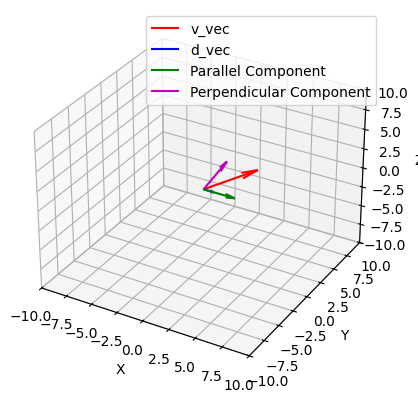

In [10]:
from mpl_toolkits.mplot3d import Axes3D

class decompose_array:
    def __init__(self, v_vec: np.array, d_vec: np.array):
        self.v_vec = v_vec
        self.d_vec = d_vec
        if self.v_vec.shape != self.d_vec.shape:
            raise ValueError("Input Error: Vectors must be of the same dimension.")
        if self.v_vec.shape[0] == 2:
            self.v_vec = np.append(self.v_vec, 0)
        if self.d_vec.shape[0] == 2:
            self.d_vec = np.append(self.d_vec, 0)

    def get_parallel_component(self) -> np.array:
        parallel_component = np.dot(self.v_vec, self.d_vec)/ np.dot(self.d_vec, self.d_vec) * self.d_vec
        return parallel_component

    def get_perpendicular_component(self) -> np.array:
        perpendicular_component = -np.cross(np.cross(self.v_vec, self.d_vec), self.d_vec)/ np.dot(self.d_vec, self.d_vec)
        return perpendicular_component
    
    def construct_projector_matrix(self) -> np.array:
        projector_matrix = np.outer(self.d_vec, self.d_vec) / np.dot(self.d_vec, self.d_vec)
        return projector_matrix
    
    def _plot_vectors(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        origin = np.array([0, 0, 0])

        ax.quiver(*origin, *self.v_vec, color='r', label='v_vec')
        ax.quiver(*origin, *self.d_vec, color='b', label='d_vec')
        parallel_component = self.get_parallel_component()
        ax.quiver(*origin, *parallel_component, color='g', label='Parallel Component')
        perpendicular_component = self.get_perpendicular_component()
        ax.quiver(*origin, *perpendicular_component, color='m', label='Perpendicular Component')

        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_zlim([-10, 10])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        plt.show()

decompose_array = decompose_array(np.array([3, 4, 1]), np.array([1, 0, 0]))
parallel_component = decompose_array.get_parallel_component()
perpendicular_component = decompose_array.get_perpendicular_component()
projector_matrix = decompose_array.construct_projector_matrix()
print("Parallel Component:", parallel_component)
print("Perpendicular Component:", perpendicular_component)
print("Projector Matrix:\n", projector_matrix)
decompose_array._plot_vectors()
    

### Task 3: Volume of a parallelepiped 

A parallelelepiped can be defined with a $3\times 3$ matrix, where the columns of the matrix contains the vectors spanning the parallelepiped. Write a function which gets a $3\times 3$ matrix as input and returns the volume of the parallelepiped spanned by the coloumns of the matrix.

1. Check that the defined object is three dimensional. 
2. First wirte a function uses the usual formula $V=A\cdot h$, where $A$ is the base area and $h$ is the height of the parallelepiped.
3. Then write a function uses the determinant.
4. Extend your code to also calculate the surface are of the parallelepiped.

In [11]:
from typing import Literal

class Parallelepiped_analysis:
    def __init__(self, matrix: np.array, output: Literal["volume_by_base_height", "volume_by_determinant", "surface_area"]):
        self.matrix = matrix
        if self.matrix.shape != (3, 3):
            raise ValueError("Input Error: The input matrix must be of shape (3, 3).")
        if output == "volume_by_base_height":
            self.result = self.get_volume_by_base_height()
            print(f"Volume by Base & Height: {self.result}")
        elif output == "volume_by_determinant":
            self.result = self.get_volume_by_determinant()
            print(f"Volume by Determinant: {self.result}")
        elif output == "surface_area":
            self.result = self.get_surface_area()
            print(f"Surface Area: {self.result}")
        else:
            raise ValueError("Output format must be either 'volume_by_base_height', 'volume_by_determinant', or 'surface_area'.")

    def get_volume_by_base_height(self):
        base_vectors = self.matrix[:, 0], self.matrix[:, 1]
        normal_vector = np.cross(base_vectors[0], base_vectors[1])
        base_area = np.linalg.norm(normal_vector)

        third_vector = self.matrix[:, 2]
        height = np.abs(np.dot(third_vector, normal_vector)) / np.linalg.norm(normal_vector)

        return base_area * height

    def get_volume_by_determinant(self):
        return np.abs(np.linalg.det(self.matrix))
    
    def get_surface_area(self):
        v1, v2, v3 = self.matrix[:, 0], self.matrix[:, 1], self.matrix[:, 2]
        area1 = np.linalg.norm(np.cross(v1, v2))
        area2 = np.linalg.norm(np.cross(v2, v3))
        area3 = np.linalg.norm(np.cross(v3, v1))
        return 2 * (area1 + area2 + area3)
    

matrix_example = np.array([[2, 3, 4],
                           [5, 1, 0],
                           [0, 6, 1]])
parallelepiped = Parallelepiped_analysis(matrix_example, output="volume_by_base_height")

Volume by Base & Height: 107.0


### Task 4

Below you have a $2\times 2$ matrix. Illustrate the following affine transformations on it:
1. Scaling
2. Shearing
3. Rotation
4. Reflection (with respect to some line/axis in some angle)

Use only `numpy` functions! 

Hint: You may want to define a transformation matrix in each case and apply that one!

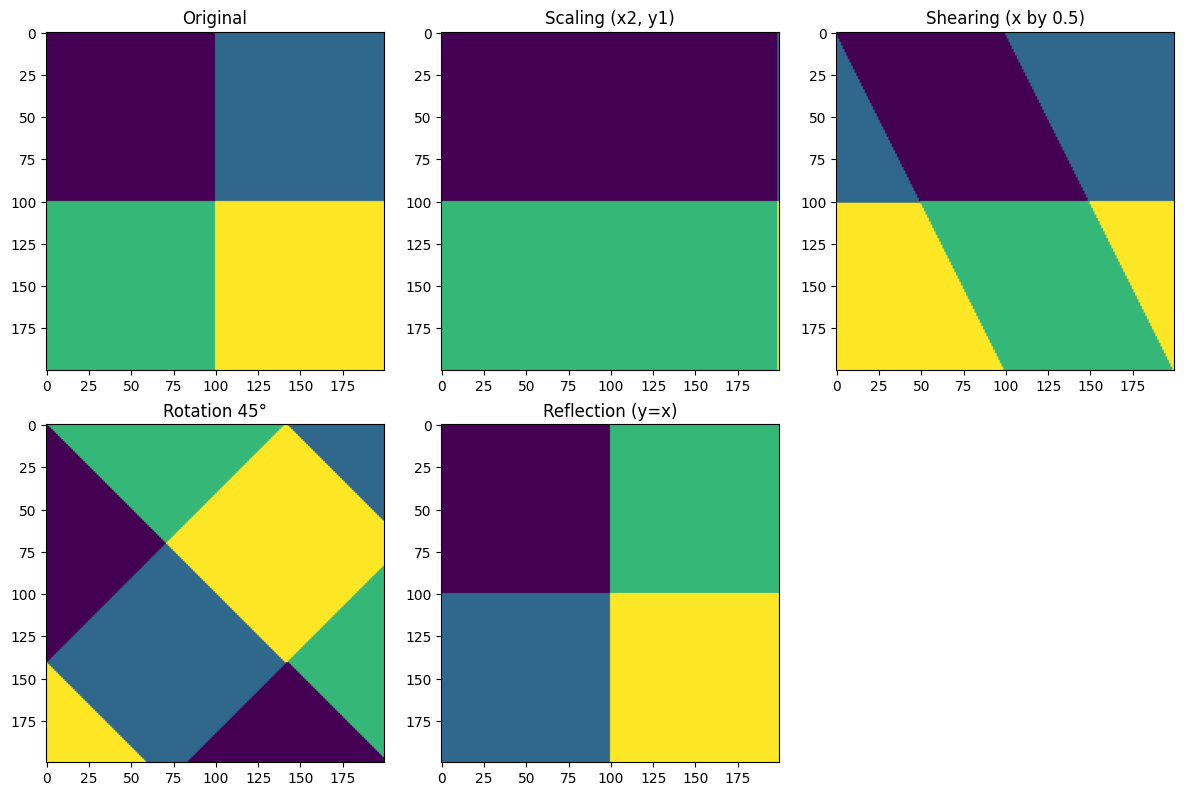

In [20]:
import numpy as np
import matplotlib.pyplot as plt

aux = np.ones((100, 100), dtype=int)
src = np.vstack([np.c_[aux, 2*aux], np.c_[3*aux, 4*aux]])

# linear transformation already defined
def linear_transformation(src, a):
    M, N = src.shape
    points = np.mgrid[0:N, 0:M].reshape((2, M*N))
    new_points = np.linalg.inv(a).dot(points).round().astype(int)
    x, y = new_points.reshape((2, M, N), order='F')
    indices = x + N*y
    return np.take(src, indices, mode='wrap')

# Scaling
def scaling(matrix: np.array, scaling_factors: tuple) -> np.array:
    sx, sy = scaling_factors
    scaling_matrix = np.array([[sx, 0],
                               [0, sy]])
    return linear_transformation(matrix, scaling_matrix)

# Shearing
def shearing(matrix: np.array, shear_factors: tuple) -> np.array:
    shx, shy = shear_factors
    shearing_matrix = np.array([[1, shx],
                                [shy, 1]])
    return linear_transformation(matrix, shearing_matrix)

# Rotation
def rotation(matrix: np.array, theta: float) -> np.array:
    # theta in radians
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta),  np.cos(theta)]])
    return linear_transformation(matrix, rotation_matrix)

# Reflection
def reflection(matrix: np.array, axis: str = "x") -> np.array:
    if axis == "x":  # reflection across x-axis
        reflection_matrix = np.array([[1, 0],
                                      [0, -1]])
    elif axis == "y":  # reflection across y-axis
        reflection_matrix = np.array([[-1, 0],
                                      [0, 1]])
    elif axis == "diag":  # reflection across line y=x
        reflection_matrix = np.array([[0, 1],
                                      [1, 0]])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'diag'")
    return linear_transformation(matrix, reflection_matrix)


plt.figure(figsize=(12, 8))

# Original
plt.subplot(231)
plt.imshow(src)
plt.title("Original")

# Scaling
plt.subplot(232)
plt.imshow(scaling(src, (2, 1)))
plt.title("Scaling (x2, y1)")

# Shearing
plt.subplot(233)
plt.imshow(shearing(src, (0.5, 0)))
plt.title("Shearing (x by 0.5)")

# Rotation
plt.subplot(234)
plt.imshow(rotation(src, np.pi/4))  # 45 degrees
plt.title("Rotation 45°")

# Reflection
plt.subplot(235)
plt.imshow(reflection(src, axis="diag"))
plt.title("Reflection (y=x)")

plt.tight_layout()
plt.show()


### Task 5

Using `scipy.ndimage.affine_transform` function put together a workflow that can manipulate an image by:

1. translation
2. scaling
3. rotation

Plot the original and resulting image. Do you notice something weird about the scaling factors? What and why does it happen?
Does it work the same for an RGB and a BW image?

In [13]:
%pip install scipy --quiet

Note: you may need to restart the kernel to use updated packages.


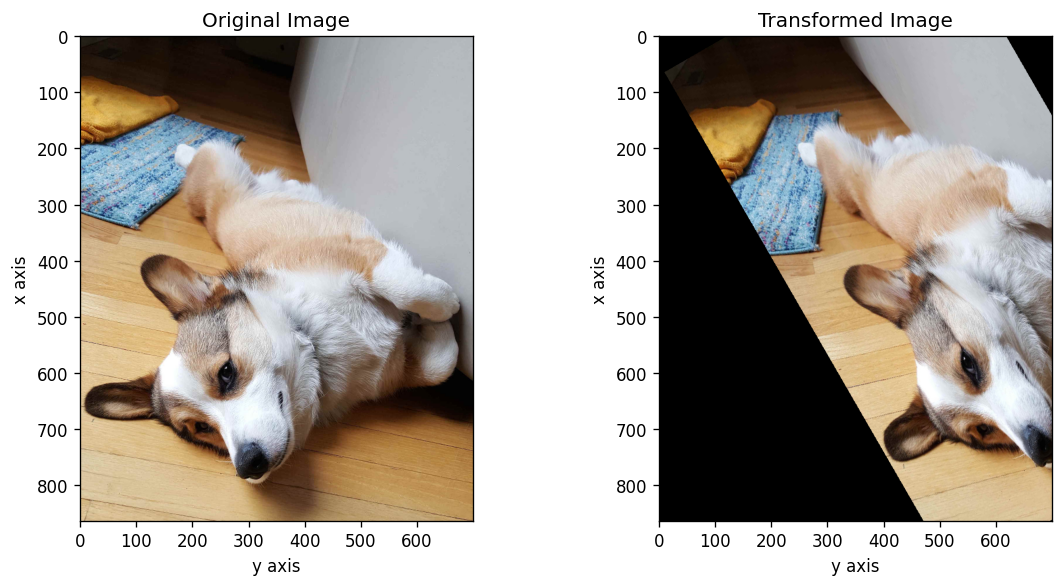

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from matplotlib.image import imread

image = imread("corgi.png")

def show(image, transformedImage):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=120)

    ax[0].set_title("Original Image")
    ax[0].imshow(image, cmap="gray" if image.ndim==2 else None)
    ax[0].set_xlabel("y axis")
    ax[0].set_ylabel("x axis")

    ax[1].set_title("Transformed Image")
    ax[1].imshow(transformedImage, cmap="gray" if transformedImage.ndim==2 else None)
    ax[1].set_xlabel("y axis")
    ax[1].set_ylabel("x axis")

    plt.tight_layout()
    plt.show()

def scaling_matrix(a1,a2):
    A = np.zeros((2,2),dtype=float)
    A[0,0] = a1
    A[1,1] = a2
    return A

def rotation(phi):
    R = np.zeros((2,2),dtype=float)
    R[0,0] = R[1,1] = np.cos(phi)
    R[0,1] = - np.sin(phi)
    R[1,0] = np.sin(phi)
    return R

def translation(t):
    A = np.zeros((2,3),dtype=float)
    A[0,0] = 1
    A[1,1] = 1
    A[:,2] = t
    return A


theta = np.deg2rad(30)
scale_x, scale_y = 1.2, 0.8
tx, ty = 50, -30

RS = rotation(theta) @ scaling_matrix(scale_x, scale_y)

matrix = np.linalg.inv(RS)

offset = [-tx, -ty]

if image.ndim == 2:  # BW
    transformed = affine_transform(
        image,
        matrix,
        offset=offset,
        output_shape=image.shape,
        order=1,
        mode="constant",
        cval=0
    )
else:  # RGB
    transformed = np.zeros_like(image)
    for c in range(image.shape[2]):
        transformed[..., c] = affine_transform(
            image[..., c],
            matrix,
            offset=offset,
            output_shape=image.shape[:2],
            order=1,
            mode="constant",
            cval=0
        )

show(image, transformed)
